[Jupyter Book](https://geo-smart.github.io/oceanography/chapters/1.1oceanscience.html) 
<br> [GitHub repo](https://github.com/geo-smart/oceanography)
<br> [Regional Cabled Array Learning Site](https://interactiveoceans.washington.edu)
<br> [Ryan Abernathy's Introduction to Physical Oceanography](https://rabernat.github.io/intro_to_physical_oceanography/intro.html#)
<br> [Abernathy's ItPO source repo](https://github.com/rabernat/intro_to_physical_oceanography)


# Ocean Science


> But I now leave my cetological System standing thus unfinished, even as the great Cathedral of Cologne was left, with the crane still standing upon the top of the uncompleted tower. For small monuments may be finished by their first architects; grand ones, true ones, ever leave the copestone to posterity. God keep me from ever completing anything. This whole book is but a draught—nay, but the draught of a draught. Oh, Time, Strength, Cash, and Patience! <br><br> -Herman Melville

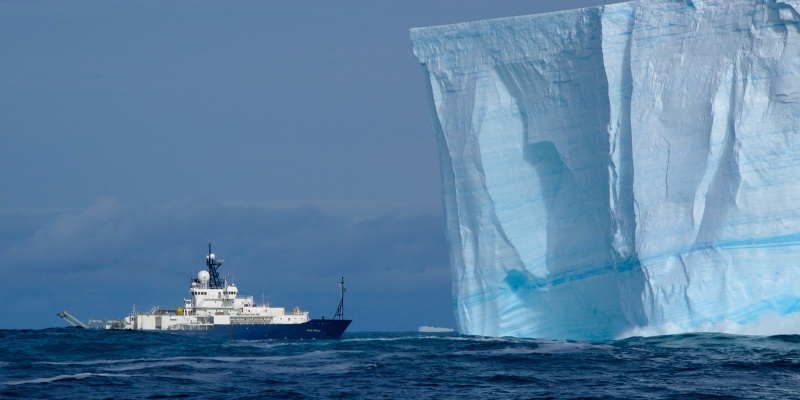

In [1]:
from IPython.display import Image
Image(filename='./../img/revelle.jpg', width=700)

> Construction note: See
> [nexus](https://github.com/robfatland/nexus/blob/gh-pages/python/jupyter.md#display-an-image)
> on inlining images.



## Science basis


This book explores research ideas in oceanography based upon observational data from sensors.
The underlying agenda is to document *how*, the methods of the exploration. 


There is a lot of detail in this *method* that can overwhelm the science. I take two approaches
to try and keep the primary focus on data interpretation. First the the book is segmented in
two parts. The first half starting with the present chapter includes very minimal technical
detail, focusing on the science narrative using *black box* methods, primarily Python
code placed in module files like `charts.py`. The second half of the book, starting with 
the chapter on **`data`**, goes into the technical methods and means.


The second approach to not overwhelming the science is to "farm out" some documentation to the 
[nexus](https://robfatland.github.io/nexus/) documentation website.


One more remark on contet: This book follows in the footsteps of 
[Ryan Abernathy's **Introduction to Physical Oceanography**](https://rabernat.github.io/intro_to_physical_oceanography/intro.html#) textbook.


To begin with a task: Characterize the nature and stability of the epipelagic ocean... somewhere.
<br>

### *Epipelagic ocean* defined


Pelagic refers to the ocean water column, surface to sea floor, and 
the term usually implies some distance away from the shore. 
*Epipelagic* is then the *upper* water column coinciding 
with the *sun illuminated* or *photic* part of the ocean.  The most 
common terms for the upper ocean are '*epipelagic zone*' and/or 
'*photic zone*'. 


To be specific, the upper 200-or-so meters of the water column is 
subject to downwelling sunlight. Below that depth very little light
penetrates even at noon on a clear day. Sunlight is the energy source 
of primary production, by which is meant photosynthesis by phytoplankton. 
Hence *epipelagic* and *photic* zones are roughly synonymous for the 
upper ocean ecosystem, a biological engine powered by sunlight.


need map here


Our observational starting point is three observing sites located in the 
northeastern Pacific Ocean. 


```
Site name           Latitude  Longitude   Depth (m)  D-offshore (km)
-----------------   --------  ---------   ---------  ---------------
Oregon Offshore     44.37     -124.96      577        67
Oregon Slope Base   44.53     -125.39     2910       101
Axial Base          45.83     -129.75     2620       453 
```



Our initial focus is a
[shallow profiler](https://interactiveoceans.washington.edu/technology/shallow-profiler-moorings/) 
maintained and by the Regional Cabled Array program at the Oregon Slope Base site. 
The shallow profiler generates a record of the state of the upper ocean at fine scale 
both in time and in depth. Once we have a handle on shallow profiler observations
we can proceed to add other sensor resources such as ARGO drifters, satellites, and NOAA buoys.

In [7]:
# offhore distances (from Oregon coast) of three shallow profiler sites in the Regional Cabled Array 
from math import cos, pi
re=6378.
d_oof = .95648 - .10448
d_osb = 1.38966 - .09422
d_axb = 5.75326  # using shore lon = -124
d2r = pi/180
km_per_rad = (cos(pi/4)*(2*pi*re))/(2*pi)
s_oof = d_oof*d2r*km_per_rad
s_osb = d_osb*d2r*km_per_rad
s_axb = d_axb*d2r*km_per_rad
print('Oregon offshore: ' + str(round(s_oof,0)) + 'km')
print('Oregon slope base: ' + str(round(s_osb,0)) + 'km')
print('Axial base: ' + str(round(s_axb,0)) + 'km')

Oregon offshore: 67.0km
Oregon slope base: 102.0km
Axial base: 453.0km


### Interpreting *stability*. 


We want to consider *stability* in terms of definite measurable phenomena.


- depth: A measurable dimension; of interest on scales of centimeters to tens of meters to kilometers
- physical characteristics: temperature, density of water, available light, current, turbulence, opacity
- chemistry: salinity, dissolved oxygen, concentration of inorganic carbon
- biology: nutrient concentration particularly nitrates, particulate distribution, protein fluorescence
- ocean-atmosphere boundary: wind, wave action, episodic events (storms); meters to hundreds of kilometers
- time: minutes to days to seasonal to annual to multi-year (climatological)
    - See note below on thermohaline circulation
- large scale perturbation: sea state, upwelling, eddies, terrigenous influence (runoff)
- structure and stratification
    - mixed layer depth, clines
    - asymptotes in the lower epipelagic
    - inversion layers, lensing


These observables can often be related to stability through deviation with time. The narrative 
consequently moves towards two ideas: What is observed? And how frequently?

### Related research topics


- plankton community structure, ecology
- Terrigenous influence

### Thermohaline circulation


Surface currents in the ocean are driven by prevailing winds. 
The ocean below the epipelagic, in contrast, is increasingly indifferent to the ocean-atmosphere
interface: Wind has less influence. Rather, circulation in the deep
ocean is driven by gradients in temperature and salinity ('*thermohaline*'), the two
important factors determining water density. 
In this regime the important time scale is a range from centuries to millenia. 
The observational record for 
the regional cabled array, in contrast, is approaching one decade.

### The utility of *coincidence* and *persistence*

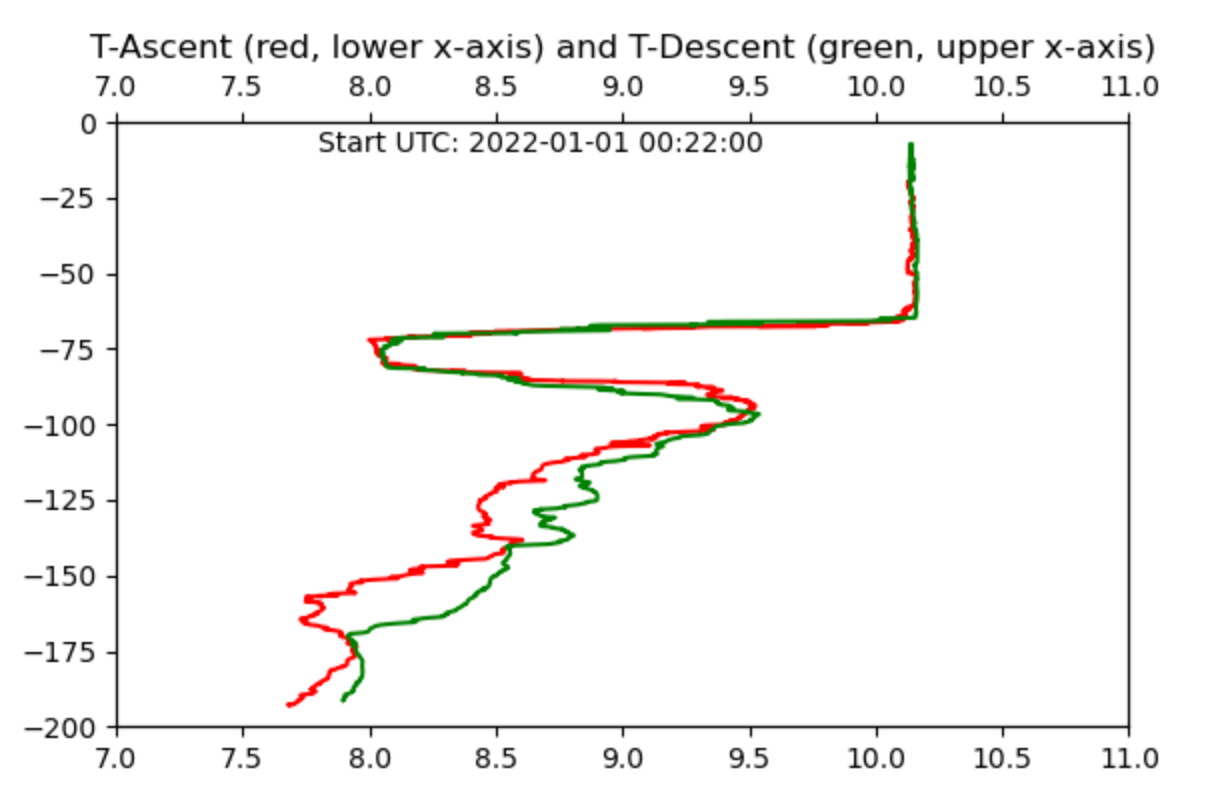

In [11]:
Image(filename='./../img/sp_ascent_vs_descent_temperature.png', width=600)

Figure: Temperature versus depth (from 200 meters to near surface): Observed by a
shallow profiler both ascending (red) and descending (green) directly thereafter. 
The low temperature excursion feature seen from 65 to 85 meters is *persistent* 
between the two observations separated in time by about 30 minutes. From 100 meters
down the profile structures are similar but exhibit a relative offset.


*Coincidence* refers to ocean structure that persists across multiple sensor streams. 
*Persistence* refers to structures that persist in time, i.e. for multiple consecutive 
observations as shown above.


Suppose a smooth data curve concerned with temperature has a noticeable 'jag' or
anomaly in measurement at a depth of 100 meters. Perhaps this reflects actual 
water temperature or it may be due to a temporary sensor issue. We can turn to
another sensor -- say salinity or chlorophyll -- and look for a matching anomaly 
at a comparable depth. If present: We have evidence that the anomaly is in fact
due to the water via coincidence. 


Continuing onward from this point: Temperature data is collected on both ascent and
descent over the course of more than an hour. Seeing the above anomaly in both profiler
phases is an example of persistence of a signal of interest. Even stronger evidence:
The anomaly appears over the course of multiple profiles (of which there are nine 
per day).


To take this one step further: We will find that the shallow profiler also measures
water velocity as a function of depth. Suppose an anomaly persists for two days and
the upper water column has a consistent velocity of 2 kilometers per hour southward.
This suggests a water mass 100 kilometers across has drifted past the profiler site;
an estimate that could be compared with satellite data, both spectral and sea level anomaly. 


### *How stable is the epipelagic ocean?*


The water column is well understood as stratified. The upper layer is
the *mixed layer*, below that is a transitional layer called the *pycnocline*, 
and below this is the *lower epipelagic layer*. ('*Pelagic*' covers the 
entirety of the open ocean water column.) 


Our starting points is a *profile*: A chart with depth as the vertical axis in meters
and observation values on the horizontal axis. Profiles tend to have a consistent
shape with occasional anomalies. Repeated profiles comprise a profile time series.

### Ocean chemistry


Let's motivate a very simple table of atoms and molecules distributed 
in the ocean. We have on the one hand the physical ocean with tides and 
currents and sunlight; we have ocean chemistry including pH and salinity (salt concentration); 
and we have biology: Life in the ocean from plankton to apex predators.
These topics are interconnected and the 
umbrella term invented for all of it -- with a particular eye to how
carbon is transported and stored -- is **biogeochemistry**. (For 
a great deal more on the topic visit this
[ocean carbon and biogeochemistry website](https://www.us-ocb.org/).)


The following table is sorted in terms of molecular mass in Daltons.
(One Dalton is effectively the mass of a single hydrogen atom.) 
The last three entries are life-based or *organic* compounds. 
[Chlorophyll](https://en.wikipedia.org/wiki/Chlorophyll) is of particular
interest as the central agent in photosynthesis: Absorbing and transferring
light energy within a structure called a photosystem. 

    
| Mass (Daltons) | Substance | Comment on measurement
|---|---|---
|1|Hydrogen cation H<sup>+</sup> | pH sensor
|17|Hydroxide ion OH<sup>-</sup> | -no direct observation-
|18|Water H<sub>2</sub>O | temperature, salinity, light sensors
|?|Calcium| -no direct observation-
|?|Silica| -no direct observation-
|46|carbon dioxide CO<sub>2</sub> | 'partial pressure' pCO2 sensor
|62|carbonic acid H<sub>2</sub>CO<sub>3</sub> | by inference
|61|bicarbonate anion HCO<sub>3</sub><sup>-</sup> | by inference
|60|carbonate CO<sub>3</sub><sup>2-</sup> | by inference
|62|nitrate NO<sub>3</sub><sup>-</sup> | nitrate sensor
|180|glucose C<sub>6</sub>H<sub>12</sub>O<sub>6</sub> | -no direct observation-
|240|Cystine (amino acid) C<sub>6</sub>H<sub>12</sub>N<sub>2</sub>O<sub>4</sub>S<sub>2</sub>| -no direct observation-
|894|chlorophyll C<sub>55</sub>H<sub>72</sub>MgN<sub>4</sub>O<sub>5</sub> | fluorescence sensor

### Ocean structure

In addition to chemical composition here are some further attributes of the ocean.

- Locations in the ocean are given precisely in terms of latitude and longitude
    - Informally we discuss location using historical terminology
        - Example: The Coral and Tasman Seas are regions of the southwestern Pacific Ocean 
- The ocean is 3700 meters deep on average, covering 70% of the earth's surface
- Coastal ocean water (shelf water) is six times as productive as the deep ocean
- The photic zone is the upper 200 meters of the ocean
    - Consequently 90% of the ocean is in perpetual darkness
- Remark on the heat capacity of seawater relative to that of the atmosphere, to land
- Water temperature decreases with depth and is fairly constant below the thermocline
    - Geothermal heat emanates from the earth's interior: At the sea floor
    - Ocean spreading centers feature hydrothermal vents
- Salinity increases with depth, typically stable below the halocline
- Ocean water has the capacity to hold oxygen: A dissolved gas
    - This holding capacity increases with lower water temperature
    - Dissolved oxygen is depleted by biological respiration
- Carbon dioxide is an atmospheric gas that dissolves in the ocean
    - Within the ocean: Carbon dioxide is converted to carbonic acid
    - Carbonic acid in turn dissociates to bicarbonate and hydrogen ions
    - Collectively this is called *carbonate chemistry*
- Productivity primarily refers to photosynthesis by phytoplankton
    - Photosynthesis is bounded on the low side by availability of nutrients and sunlight
    - Photosynthesis is bounded on the high side by saturation (availability of chlorophyll)
- Nutrients: Nitrate  
    

### More questions related to stability

- Productivity estimation: Calculate from observation versus observe directly
    - Use PAR, spectral irradiance, nitrate, mixed layer > productivity estimate
    - Should diel migration drive a signal in the data? Null hypothesis?
        - Is vertical current speed a contributor?
    - To what degree can sonar data be matched to profiler data?
        - Note: The sonar of interest is at Endurance Offshore
    - Does ROMS estimate productivity?
    - Does MODIS estimate productivity?
        - Supposing yes:
            - Does eddie structure in time series give a testable signal?
            - In relation: Does north/east ADCP data give testable scale and structure?
            - What work exists for similar comparisons using ARGO BGC drifters?
- Satellite validation, extrapolation
    - Are satellite-derived SST, chlor-a, MSLA validated by in situ sensors? 
    - Supposing yes: Spatio-temporal structural spectra?
- Can the photic zone water column characterization be extended downward?
    - Deep profilers (sites with depth 500m, 2800m, 2400m)
    - ARGO
    - Gliders
    - Supposing yes: Is this relevant to understanding the carbon cycle? Other cycles?
- Are these methods able to identify terrigenous influences (e.g. the Columbiar River)?
- Are these methods able to identify upwelling signals?
- Tie together the Endurance offshore (top of shelf) to Oregon Slope Base (bottom of shelf)
    - Are observations correlated? (Particularly 'beyond' seasonal in some sense)
- Edge sensor utility: FDOM and particulate backscatter? Spectrophotometer? Hydrophone?


### Questions on method


- Is shallow profiler data reliably interpretable?
    - Sensor by sensor: Can 30-day-span mean signals be used to flag anomalies?
    - Supposing yes: Characterize anomaly signals in three dimensions { sensor, depth, time }
    - Can the mixed layer depth be measured as a synthetic time series dataset


### Microbial ecology and global carbon


- DOM is dissolved organic matter
    - small organic molecules not functional within organisms
    - CDOM is an older term for color-DOM (has some spectral signature)
    - FDOM indicates fluorescent, hence measurable by fluorometry in some degree
- metabolites are products of metabolic processes
- energy consumption dependent on iron, nitrates, phosphorous; temperature mediation 
- Carbon pools measured in Gigatons (one billion x one thousand kilograms) 
    - or equivalently in Petagrams of Carbon PgC
    - Distinct from the mass of greenhouse gases: 44/12 times larger
        - CO2 has a molecular weight of 44 whereas Carbon usually has an atomic weight of 12 
    - Earth system science considers cycling of matter and energy
        - Exchange of carbon between reservoirs is expressed in terms of rates of transfer
            - for exmple PgC per year
    - Earth carbon pools include ocean, atmosphere, lithosphere, soil, peat, living creatures... 
    - Carbon transfer mechanisms include 
        - primary production
        - greenhoues gas (GHG) emission by humans 
        - carbon dioxide moving from the atmosphere into the ocean. 
            - GHG transfer to the atmosphere from the lithosphere is about 9 PgC / year
            - combining fuel burning with land-use changes such as slash-and-burn clearcutting
            - The ocean biological pump and solubility pump combine 
            - to move about 11 PgC into the ocean's interior per year 
                - ...a few pieces of a more complex picture.
        - Below I calculate the mass of dissolved organic matter in the ocean
            - The approximate value is given as 1,000 PgC
            - The calculation arrives at 645 PgC         
- Inorganic carbon: Simplest carbon compounds
    - the ocean-atmosphere interface facilitates dissolving of atmospheric carbon dioxide in the ocean
    - However carbon dioxide molecules dissolved in the ocean are subject to modification ('*carbonate chemistry*')
        - Atmospheric CO2 has a half-life of 60 years...
            - whereas dissolved CO2 in the ocean has a half-life of minutes
                - $CO_2$ carbon dioxide from the atmosphere, dissolved in the ocean transforms into
                - $H_2CO_3$ carbonic acid which dissociates into
                    - $HCO_3^-$ bicarbonate ions and
                    - $H^+$ hydrogen ions 
                        - which lower the pH of the ocean
                            - historically from 8.15 in 1950 to 8.05 in 2020

#### Two related views of ocean science

The preceding material treats the ocean as a complex physical and chemical system
that we can observe over time. For example the following chart shows six observable
parameters varying with depth including temperature and salinity.

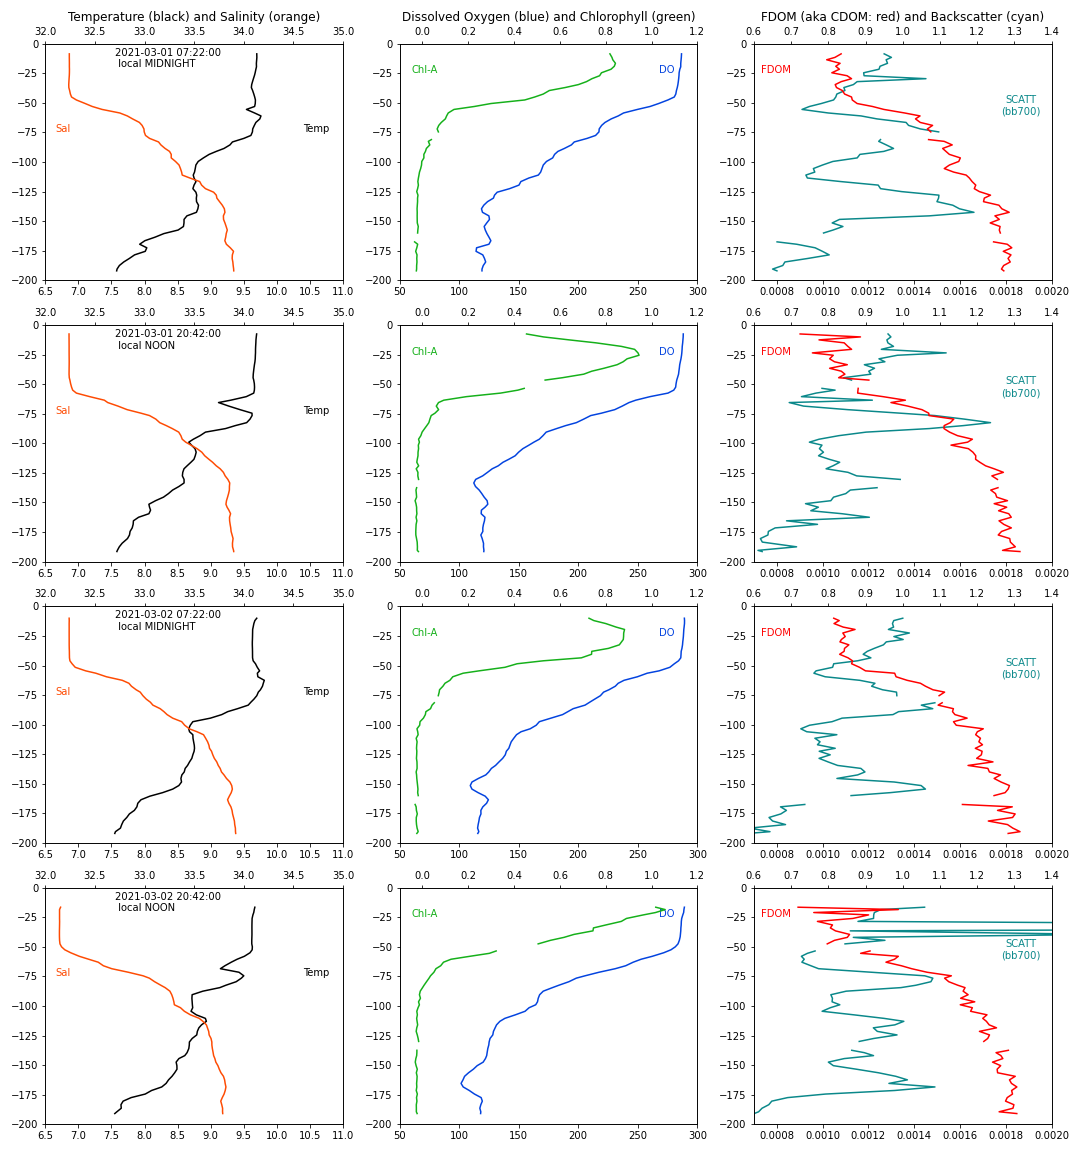

In [2]:
Image(filename='./../img/ABCOST_signals_vs_depth_and_time.png', width=600)

Caption: Salinity, Temperature, Dissolved Oxygen and Bio-optical signals with depth


A complementary view of oceanograpy concerns ecology, how life interacts with
the surrounding environment. 

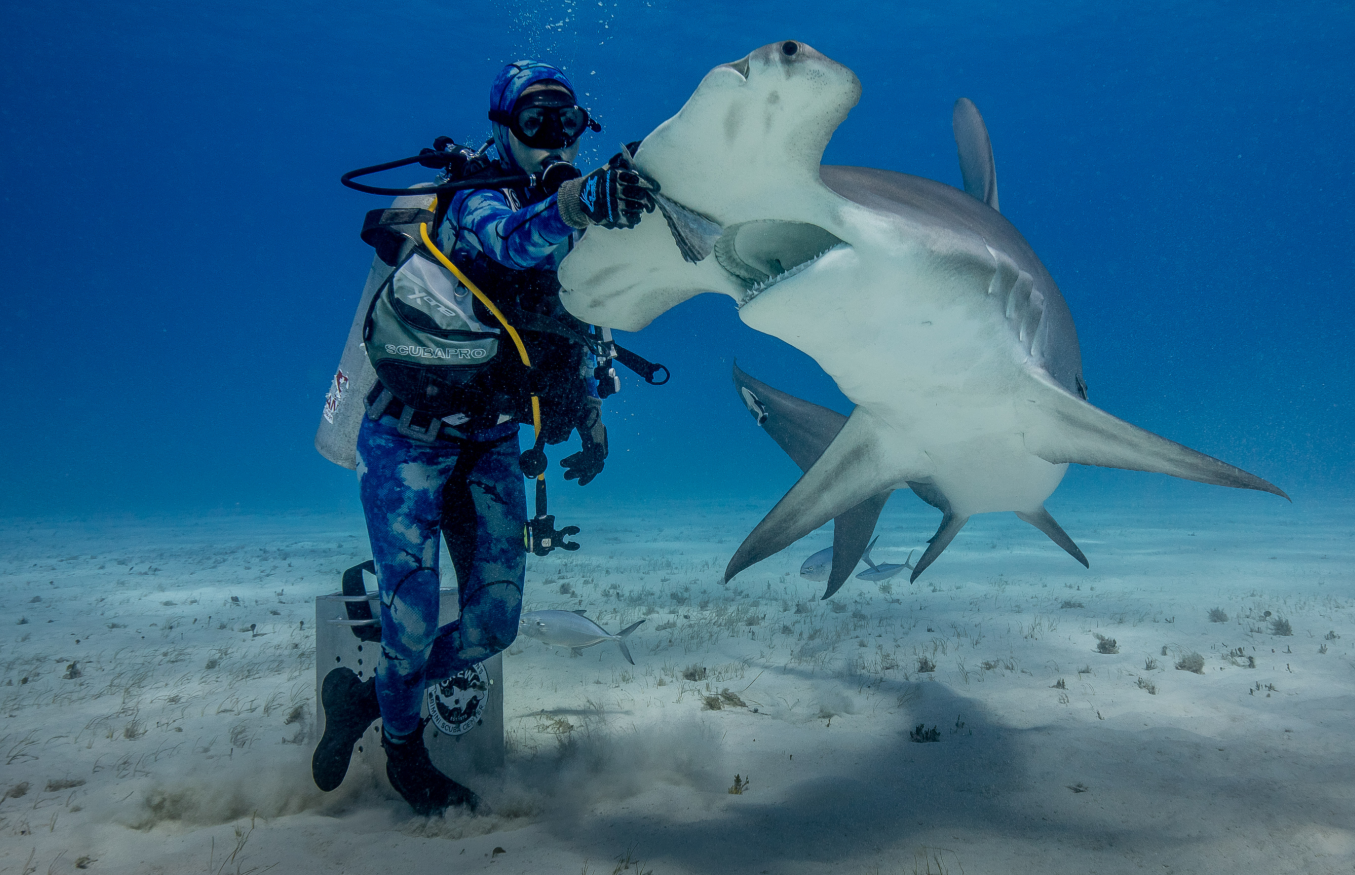

In [3]:
Image(filename='./../img/Sphyrna_mokarran.png', width=600)

Caption: Scientist cooperating with an apex predator


Example predation stages related to the hammerhead shark: 

    
- Hammerhead shark
    - Bluespotted stingray ([Neotrygon kuhlii](https://en.wikipedia.org/wiki/Kuhl%27s_maskray))
        - Butterfly chiton ([Cryptoconchus porosus](https://en.wikipedia.org/wiki/Cryptoconchus_porosus))
            - Benthic (shallow sea floor) diatoms
                - which convert sunlight to chemical energy by photosynthesis


Photosynthesis happens in organelles using a pigment called chlorophyll, producing carbohydrates that store 
energy. The molecular basis of this process is carbon dioxide and other carbonate molecules plus water. 
Molecular oxygen is a by-product of the process.


Carbonate molecules dissolved in ocean water are
considered inorganic and are not usable as an energy supply. Carbohydrate molecules are built from
these carbonate molecules and they *are* usable as an energy supply (by both producers like the
diatom and by consumers like the Hammerhead.) The conversion from inorganic to organic
molecules via sunlight is the key energy transformation at the base of the food web. Carbon is
ubiquitous in the ocean; but it is always undergoing change in molecular form from lower to
higher stored energy and back again.


### Carbon pools


* Ocean 38,000 PgC
  * Dissolved organic carbon (size 0.22 to 0,70 microns): 1000 PgC
  * Inorganic carbon (dissolved CO2 and related carbonates): 37,000 PgC
* Earth biomass: 600 PgC
* Atmosphere: 800 PgC
* Soil + peat: 1500 PgC (1000 PgC organic)


### Carbon transport


* Marine autotrophs: 50 PgC/a
* Terrestrial primary production 50 PgC/a
* Lithosphere to atmosphere (human activity) 10 PgC/a
* Atmosphere to ocean interior (Biological and Solubility Pumps): 11 PgC/a 


Noting that the biological pump operates at about the same scale as the marine carbon pump; 
and these numbers are about one fifth of marine primary production we can make the case that
biological activity is an important component of the global carbon cycle. 


* Carbon is 1, 1, 4, 50 respectively life, atmosphere, soil, ocean. 1 = 600 Gton.
* Where the edge is
    * System models are vague. For example what drives coastal productivity?
    * How is decreasing ocean pH impacting ecologies?
    * What is the data trying to tell us (deluge problem)
* What you bring: Imagination, enthusiasm, perseverence
    * Even as an aware person you can advocate for science education
* What you can develop: Math, computing skills (domain context of course!)


Other programs


* ARGO
* Estuary modeling
* Currents and ecosystems
* Metagenomics

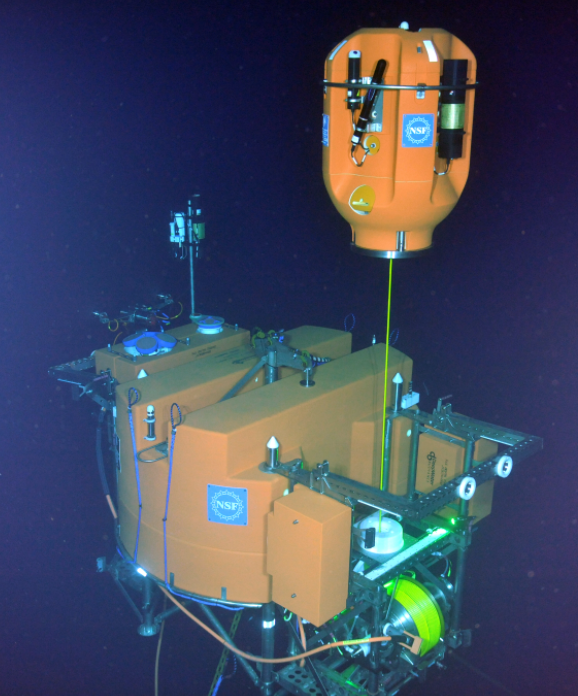

In [4]:
Image(filename='./../img/shallowprofilerinsitu.png', width = 600)

Caption: Shallow profiler platform (lower half of image) gradually spooling out a winch
(bright green cable) permitting the Science Pod to ascend through the upper water column.


Profiler stage times in minutes


```
Ascent:    67
Descent:   45      (exception: local noon and midnight descents are about an hour longer)
Rest:      45
```


Ascent data are
considered more pristine; 
although pH and pCO2 are unique in that they are recorded on *descent*.

## A DOC Calculation

The [Ocean Carbon and Biogeochemistry (OCB)](https://us-ocb.org)
organization is concerned with the science of the ocean carbon cycle.
This includes carbon in various chemical forms considered as distributed reservoirs. By far the largest
of these is dissolved inorganic carbon (DIC) associated with carbonate chemistry. A second important
carbon reservoir is Dissolved Organic Carbon, referring to biologically important carbon compounds. 
The following cell -- in part to illustrate Python utility -- gives an estimate of the 
total mass of the ocean's dissolved organic carbon reservoir. 
More on DOC can be found at this 
[OCB web resource](https://www.us-ocb.org/what-controls-the-distribution-of-dissolved-organic-carbon-in-the-surface-ocean/).

In [1]:
import oceanscience
oceanscience.OceanScienceCalculations()

Mass of earth's oceans: 1.34e+09 GTons
Organic carbon (kg) dissolved per kg of seawater: 4.8e-07
Dissolved organic carbon mass, earth's oceans: 644.6 GTons



### Agenda


- Getting our feet wet
    - Ocean Science (this chapter): Establish a heirarchy of research questions and terminology
    - Data: Structure, necessity of profile metadata, sensors-to-measurements
    - Epipelargosy: A sense of the structure of the epipelagic water column
    - Anomaly and Coincidence: We recognize the 'normal' signal so let's characterize instability
    - Annotation: An interpretive narrative
- Other observation systems
    - ARGO: A massive drifter program
    - GLODAP: A compilation of ocean characteristics
    - MODIS: Satellite remote sensing of sea surface color
    - ROMS: A circulation model
- Bio-optics
    - Spectrophotometer
    - PAR and spectral irradiance
- Digging in to the stability question
    - Temperature:
- Appendices: Technical background
    - shallow profiler technical
    - documentation
    - issues


### Additional themes of GeoSMART


- Workflows
- Reproducibility
- Troubleshooting